In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [3]:
# Load the parquet files
df_data = pd.read_parquet('/Users/prada/Desktop/coding/SIH25/sih25/DATAOPS/preprocessed_data/D2900765_067_data.parquet')
df_profiles = pd.read_parquet('/Users/prada/Desktop/coding/SIH25/sih25/DATAOPS/preprocessed_data/D2900765_067_profiles.parquet')

# Basic info about both datasets
print("=== DATA FILE ===")
print(f"Shape: {df_data.shape}")
print(f"Columns: {list(df_data.columns)}")
print("\n=== PROFILES FILE ===")
print(f"Shape: {df_profiles.shape}")
print(f"Columns: {list(df_profiles.columns)}")

=== DATA FILE ===
Shape: (64, 23)
Columns: ['file_name', 'float_id', 'profile_idx', 'data_mode', 'timestamp', 'latitude', 'longitude', 'cycle_number', 'level_idx', 'pres_qc', 'pres', 'pres_error', 'temp_qc', 'temp', 'temp_error', 'psal_qc', 'psal', 'psal_error', 'depth_m', 'n_levels', 'max_pressure', 'temp_range', 'sal_range']

=== PROFILES FILE ===
Shape: (1, 16)
Columns: ['profile_idx', 'float_id', 'timestamp', 'latitude', 'longitude', 'n_levels', 'max_pressure', 'min_pressure', 'temp_min', 'temp_max', 'temp_mean', 'temp_count', 'psal_min', 'psal_max', 'psal_mean', 'psal_count']


# Looking for the Data Structure

In [4]:
# Look at the first few rows of each dataset
print("=== DATA FILE - First 5 rows ===")
display(df_data.head())

print("\n=== PROFILES FILE - First 5 rows ===")
display(df_profiles.head())

=== DATA FILE - First 5 rows ===


,file_name,float_id,profile_idx,data_mode,timestamp,latitude,longitude,cycle_number,level_idx,pres_qc,...,temp,temp_error,psal_qc,psal,psal_error,depth_m,n_levels,max_pressure,temp_range,sal_range
0,D2900765_067.nc,01,0,',NaT,14.926,88.67,67,0,[b'1'],...,28.757000,0.002,[b'1'],33.424095,0.01,4.486751,64,1505.199951,24.390999,1.613598
1,D2900765_067.nc,01,0,',NaT,14.926,88.67,67,1,[b'1'],...,28.760000,0.002,[b'1'],33.424114,0.01,8.871530,64,1505.199951,24.390999,1.613598
2,D2900765_067.nc,01,0,',NaT,14.926,88.67,67,2,[b'1'],...,28.759001,0.002,[b'1'],33.424076,0.01,14.072081,64,1505.199951,24.390999,1.613598
3,D2900765_067.nc,01,0,',NaT,14.926,88.67,67,3,[b'1'],...,28.764999,0.002,[b'1'],33.423126,0.01,18.966719,64,1505.199951,24.390999,1.613598
4,D2900765_067.nc,01,0,',NaT,14.926,88.67,67,4,[b'1'],...,28.764999,0.002,[b'1'],33.423607,0.01,23.759384,64,1505.199951,24.390999,1.613598



=== PROFILES FILE - First 5 rows ===


,profile_idx,float_id,timestamp,latitude,longitude,n_levels,max_pressure,min_pressure,temp_min,temp_max,temp_mean,temp_count,psal_min,psal_max,psal_mean,psal_count
0,0,01,NaN,14.926,88.67,64,1505.199951,4.4,4.374,28.764999,15.656459,61,33.423126,35.036724,34.674571,60


In [8]:
# Check data types and missing values
print("=== DATA FILE - Info ===")
print(df_data.info())
print(f"\nMissing values:\n{df_data.isnull().sum()}")

print("\n=== PROFILES FILE - Info ===")
print(df_profiles.info())
print(f"\nMissing values:\n{df_profiles.isnull().sum()}")

=== DATA FILE - Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   file_name     64 non-null     string        
 1   float_id      64 non-null     string        
 2   profile_idx   64 non-null     Int8          
 3   data_mode     64 non-null     string        
 4   timestamp     0 non-null      datetime64[ns]
 5   latitude      64 non-null     float64       
 6   longitude     64 non-null     float64       
 7   cycle_number  64 non-null     Int8          
 8   level_idx     64 non-null     Int8          
 9   pres_qc       64 non-null     string        
 10  pres          64 non-null     float32       
 11  pres_error    64 non-null     float32       
 12  temp_qc       64 non-null     string        
 13  temp          61 non-null     float32       
 14  temp_error    61 non-null     float32       
 15  psal_qc       64 

In [9]:
print("+++++++++++++++++QUICK DESCRIPTION++++++++++++++++++++++")
print("DATA FILE:")
print(df_data.describe())
print("\nPROFILES FILE:")
print(df_profiles.describe())

+++++++++++++++++QUICK DESCRIPTION++++++++++++++++++++++
DATA FILE:
       profile_idx timestamp  latitude     longitude  cycle_number  level_idx  \
count         64.0         0    64.000  6.400000e+01          64.0       64.0   
mean           0.0       NaT    14.926  8.867000e+01          67.0   33.65625   
min            0.0       NaT    14.926  8.867000e+01          67.0        0.0   
25%            0.0       NaT    14.926  8.867000e+01          67.0      17.75   
50%            0.0       NaT    14.926  8.867000e+01          67.0       33.5   
75%            0.0       NaT    14.926  8.867000e+01          67.0      49.25   
max            0.0       NaT    14.926  8.867000e+01          67.0       70.0   
std            0.0       NaN     0.000  1.432320e-14           0.0  19.860001   

              pres  pres_error       temp  temp_error       psal  psal_error  \
count    64.000000        64.0  61.000000      61.000  60.000000   60.000000   
mean    398.849976         2.4  15.656459 

# Finding unique values from the data


In [10]:
# Explore unique values in key columns
print("=== Key Information ===")
print(f"Unique float IDs: {df_data['float_id'].nunique()}")
print(f"Date range: {df_data['timestamp'].min()} to {df_data['timestamp'].max()}")
print(f"Pressure range: {df_data['pres'].min():.2f} to {df_data['pres'].max():.2f}")
print(f"Temperature range: {df_data['temp'].min():.2f} to {df_data['temp'].max():.2f}")
print(f"Salinity range: {df_data['psal'].min():.2f} to {df_data['psal'].max():.2f}")

=== Key Information ===
Unique float IDs: 1
Date range: NaT to NaT
Pressure range: 4.40 to 1505.20
Temperature range: 4.37 to 28.76
Salinity range: 33.42 to 35.04


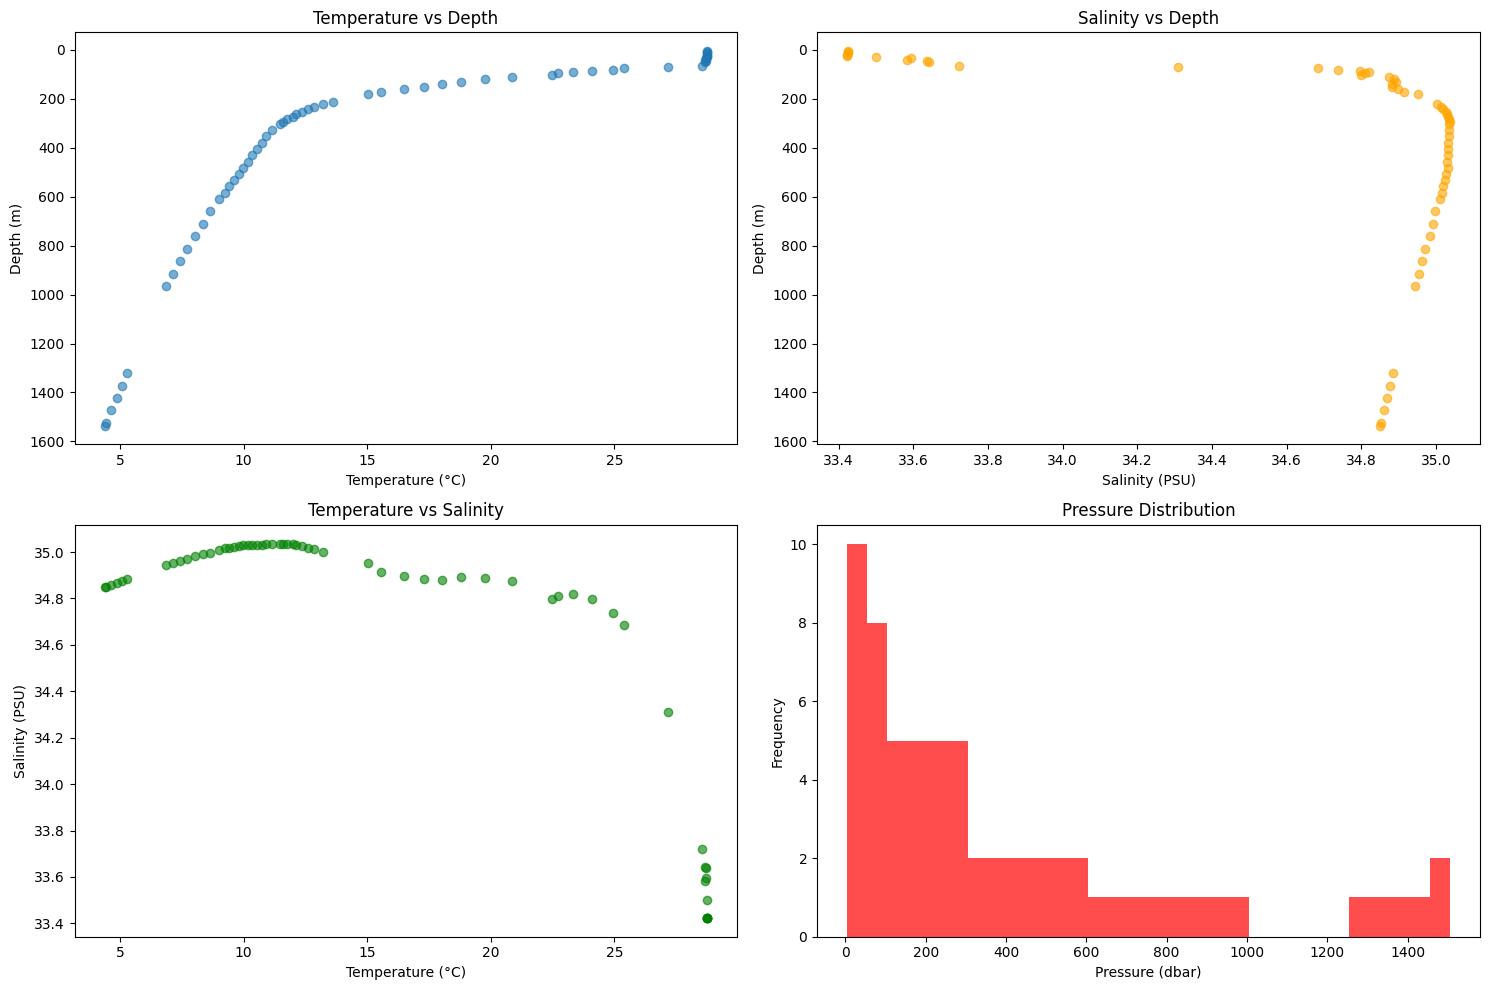

In [11]:
# Create some basic plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Temperature vs Depth
axes[0,0].scatter(df_data['temp'], df_data['depth_m'], alpha=0.6)
axes[0,0].set_xlabel('Temperature (°C)')
axes[0,0].set_ylabel('Depth (m)')
axes[0,0].set_title('Temperature vs Depth')
axes[0,0].invert_yaxis()  # Invert y-axis so depth increases downward

# Salinity vs Depth
axes[0,1].scatter(df_data['psal'], df_data['depth_m'], alpha=0.6, color='orange')
axes[0,1].set_xlabel('Salinity (PSU)')
axes[0,1].set_ylabel('Depth (m)')
axes[0,1].set_title('Salinity vs Depth')
axes[0,1].invert_yaxis()

# Temperature vs Salinity
axes[1,0].scatter(df_data['temp'], df_data['psal'], alpha=0.6, color='green')
axes[1,0].set_xlabel('Temperature (°C)')
axes[1,0].set_ylabel('Salinity (PSU)')
axes[1,0].set_title('Temperature vs Salinity')

# Pressure distribution
axes[1,1].hist(df_data['pres'], bins=30, alpha=0.7, color='red')
axes[1,1].set_xlabel('Pressure (dbar)')
axes[1,1].set_ylabel('Frequency')
axes[1,1].set_title('Pressure Distribution')

plt.tight_layout()
plt.show()


In [12]:
# Check quality control flags
print("=== Quality Control Summary ===")
print(f"Pressure QC flags: {df_data['pres_qc'].value_counts()}")
print(f"Temperature QC flags: {df_data['temp_qc'].value_counts()}")
print(f"Salinity QC flags: {df_data['psal_qc'].value_counts()}")

=== Quality Control Summary ===
Pressure QC flags: pres_qc
[b'1']    64
Name: count, dtype: Int64
Temperature QC flags: temp_qc
[b'1']    61
[b'4']     3
Name: count, dtype: Int64
Salinity QC flags: psal_qc
[b'1']    60
[b'4']     4
Name: count, dtype: Int64
